# Meteoschweiz 
## Cleanup and  required imports

In [37]:
# conda install -c conda-forge pandas matplotlib jupyter pyyaml papermill nbconvert pandoc ipynbname
# ‘Soft’ reset: Only clears your namespace, leaving history intact.
%reset -sf 
import pandas as pd
from datetime import datetime
import matplotlib.cbook

## Available weather stations

In [38]:
url = 'https://data.geo.admin.ch'
path = 'ch.meteoschweiz.klima/nbcn-tageswerte'
wsurl = url + '/' + path + '/' + 'liste-download-nbcn-d.csv'
ws = pd.read_csv(wsurl, sep=";", header=0, encoding = "ISO-8859-1").dropna()
pd.options.display.float_format = '{:.2f}'.format
ws.rename(columns={'Station height m. a. sea level': 'Elevation'}, inplace=True)
ws.drop(['WIGOS-ID', 'CoordinatesE', 'CoordinatesN', 'URL Previous years (verified data)', 
         'URL Current year', 'station/location', 'Canton', 'Climate region'], axis=1)

,Station,Data since,Elevation,Latitude,Longitude
0,Altdorf,01.01.1864,438.00,46.89,8.62
1,Andermatt,01.01.1864,1438.00,46.63,8.58
2,Basel / Binningen,01.01.1755,316.00,47.54,7.58
3,Bern / Zollikofen,01.01.1864,553.00,46.99,7.46
4,La Chaux-de-Fonds,01.01.1900,1017.00,47.08,6.79
5,Château-d'Oex,01.01.1879,1028.00,46.48,7.14
6,Chaumont,01.01.1864,1136.00,47.05,6.98
7,Davos,01.01.1864,1594.00,46.81,9.84
8,Elm,01.02.1878,958.00,46.92,9.18
9,Engelberg,01.01.1864,1036.00,46.82,8.41


## Specific weather station

In [39]:
# Define the default parameters and tag the cell accordingly
wsno = -1 # default -1 selects the last index, 2 sets BAS weather station
#
# Calling syntax from shell:
#
# time for i in {0..28}; do \ 
#   papermill MeteoCH.ipynb \
#   MeteoCH.output.ipynb \                 # ...or /dev/null
#   -p wsno $i; done
#
# The time command at the beginning of the call may be omitted.

In [40]:
wstation = ws['Station'].tolist()[wsno]
print(wsno)
df = ws[ws.Station==wstation] 
label = df.iloc[0]['station/location'] #.to_string()[::-1][0:3][::-1]
print(f"The label of weather station {wstation} is {label}.")

-1
The label of weather station St. Gallen is STG.


## Current online observations

In [41]:
maxrows = 400 # displayed number of past days 
filenm = "nbcn-daily_"
ext="csv"
currurl = url + "/" + path + "/" + filenm + label + "_current." + ext
prevurl = url + "/" + path + "/" + filenm + label + "_previous." + ext
cf = pd.read_csv(currurl, sep=";", index_col='date',converters={'date':pd.to_datetime}).drop(['station/location'], axis=1) #, engine='pyarrow')
for col in  cf.columns:
    cf[col] = pd.to_numeric(cf[col], errors='coerce')
pf = pd.read_csv(prevurl, sep=";", index_col='date',converters={'date':pd.to_datetime}).drop(['station/location'], axis=1) #, engine='pyarrow')
for col in  pf.columns:
    pf[col] = pd.to_numeric(pf[col], errors='coerce')
df = pd.concat([pf, cf], axis=0).tail(maxrows)

## Summary statistics

In [42]:
df.describe().map('{:.1f}'.format)

,gre000d0,hto000d0,nto000d0,prestad0,rre150d0,sre000d0,tre200d0,tre200dn,tre200dx,ure200d0
count,400.0,400.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,134.2,0.7,nan,927.6,4.1,274.5,10.5,7.2,14.1,74.0
std,99.4,2.4,nan,7.0,9.0,269.6,7.4,6.7,8.4,13.8
min,3.0,0.0,nan,898.4,0.0,0.0,-7.4,-10.0,-5.6,38.0
25%,50.0,0.0,nan,924.7,0.0,15.5,5.5,2.2,8.8,63.9
50%,113.0,0.0,nan,928.0,0.0,184.0,10.4,7.7,14.1,75.5
75%,206.0,0.0,nan,931.7,4.2,476.0,16.5,12.6,21.2,84.8
max,365.0,14.0,nan,944.6,82.7,902.0,25.9,20.9,31.8,100.0


In [43]:
(rows, cols) = df.shape
print(f"{rows} observations from {min(df.index)} to {max(df.index)}.")

400 observations from 2022-09-24 00:00:00 to 2023-10-28 00:00:00.


## Description of observed parameters

In [44]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

zip_url = url + "/" + path + "/" + "data.zip"
plist = [] # parameter
ulist = [] # unit
dlist = [] # description

with urlopen(zip_url) as f:
    with BytesIO(f.read()) as b, ZipFile(b) as myzipfile:
        rf = myzipfile.open('1_how-to-download-nbcn-d.txt')
        blines = rf.readlines()
        rf.close()
        for i in range(14, 25):
            line =blines[i].decode('unicode-escape').rstrip('\r\n')
            plist.append(line[0:21].strip())
            ulist.append(line[21:38].strip())
            dlist.append(line[38:].strip('\n'))

# list of lists instead of list of tuples
##zipped = zip(plist[1:], ulist[1:], dlist[1:])
list_of_lists = [list(tup) for tup in zip(plist[1:], ulist[1:], dlist[1:])]
cols = [plist[0], ulist[0], dlist[0]]

par = pd.DataFrame(list_of_lists, columns = cols)
print(par)

  Parameter Einheit                                       Beschreibung
0  gre000d0    W/m²                       Globalstrahlung; Tagesmittel
1  hto000d0      cm          Gesamtschneehöhe; Morgenmessung von 6 UTC
2  nto000d0       %                       Gesamtbewölkung; Tagesmittel
3  prestad0     hPa      Luftdruck auf Stationshöhe (QFE); Tagesmittel
4  rre150d0      mm    Niederschlag; Tagessumme 6 UTC - 6 UTC Folgetag
5  sre000d0     min                      Sonnenscheindauer; Tagessumme
6  tre200d0      °C         Lufttemperatur 2 m über Boden; Tagesmittel
7  tre200dn      °C        Lufttemperatur 2 m über Boden; Tagesminimum
8  tre200dx      °C        Lufttemperatur 2 m über Boden; Tagesmaximum
9  ure200d0       %  Relative Luftfeuchtigkeit 2 m über Boden; Tage...


## Air temperature

In [45]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
fswidth = 10
fsheight = 5

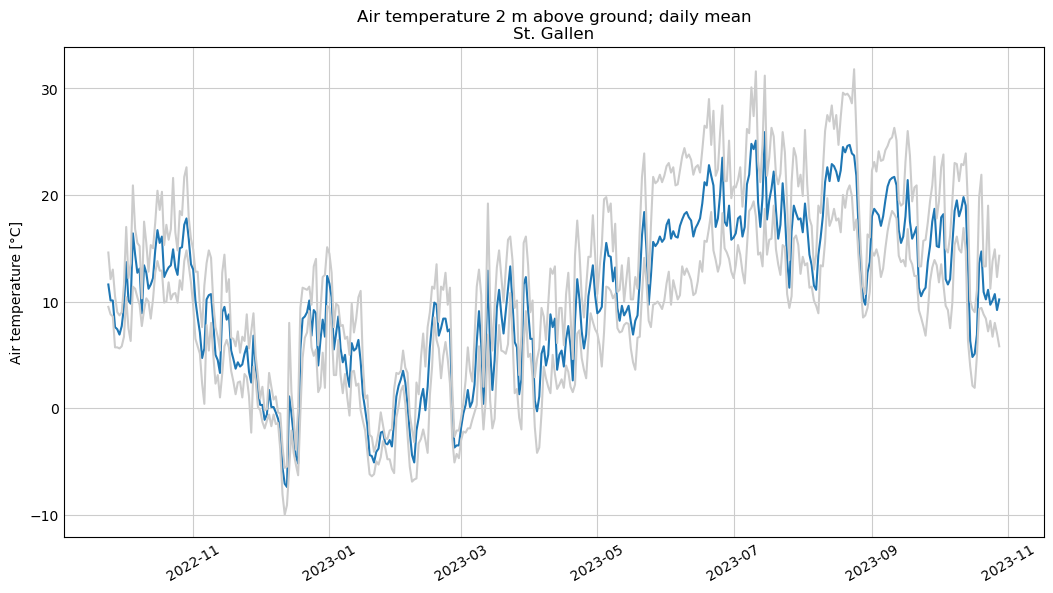

In [46]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.tre200d0)
axs.plot(df.index, df.tre200dn, color='0.8')
axs.plot(df.index, df.tre200dx, color='0.8')
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')
#axs.grid(which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Air temperature [°C]')
plt.title('Air temperature 2 m above ground; daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Global radiation

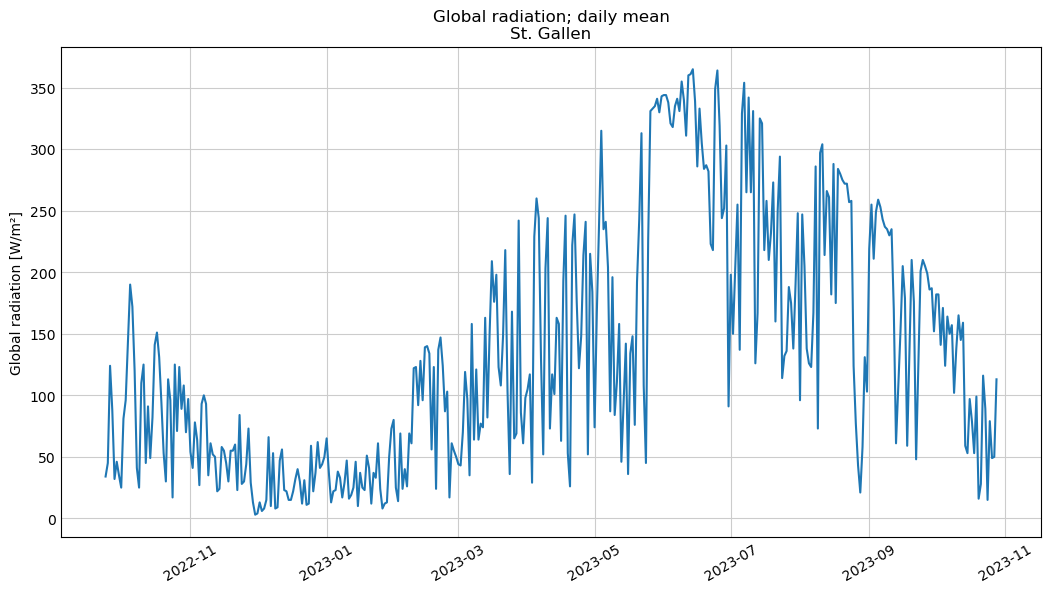

In [47]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.gre000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Global radiation [W/m²]')
plt.title('Global radiation; daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Total snow depth

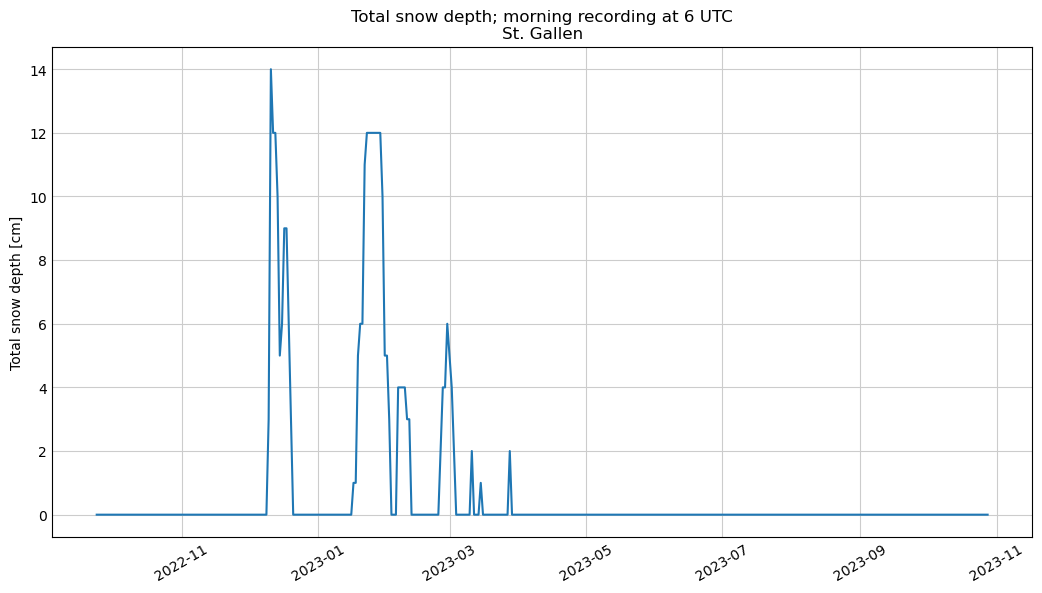

In [48]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.hto000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Total snow depth [cm]')
plt.title('Total snow depth; morning recording at 6 UTC\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Cloud cover

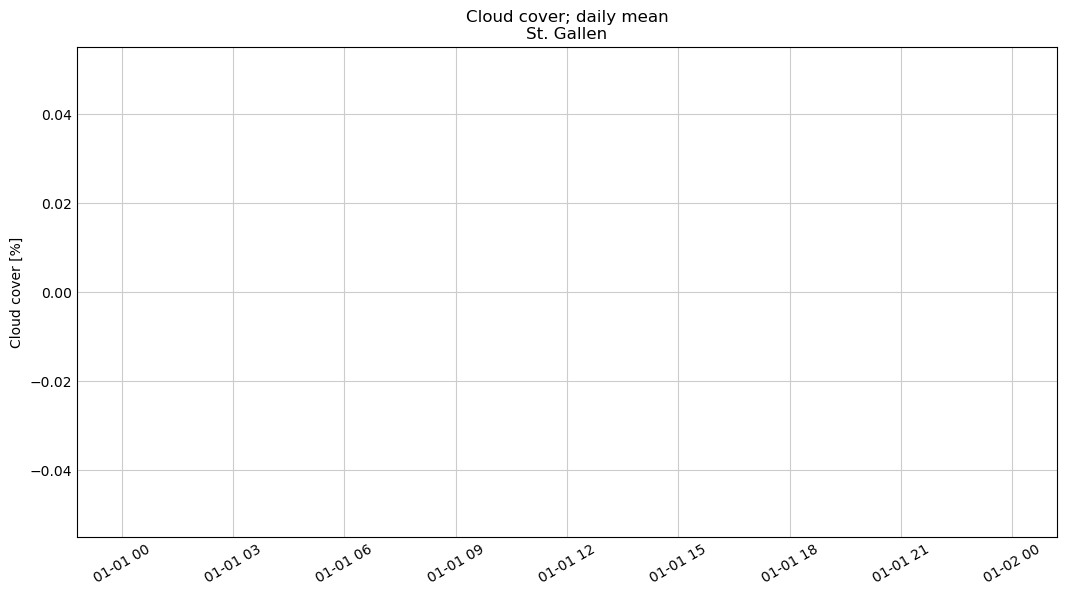

In [49]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.nto000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Cloud cover [%]')
plt.title('Cloud cover; daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Pressure at station level 

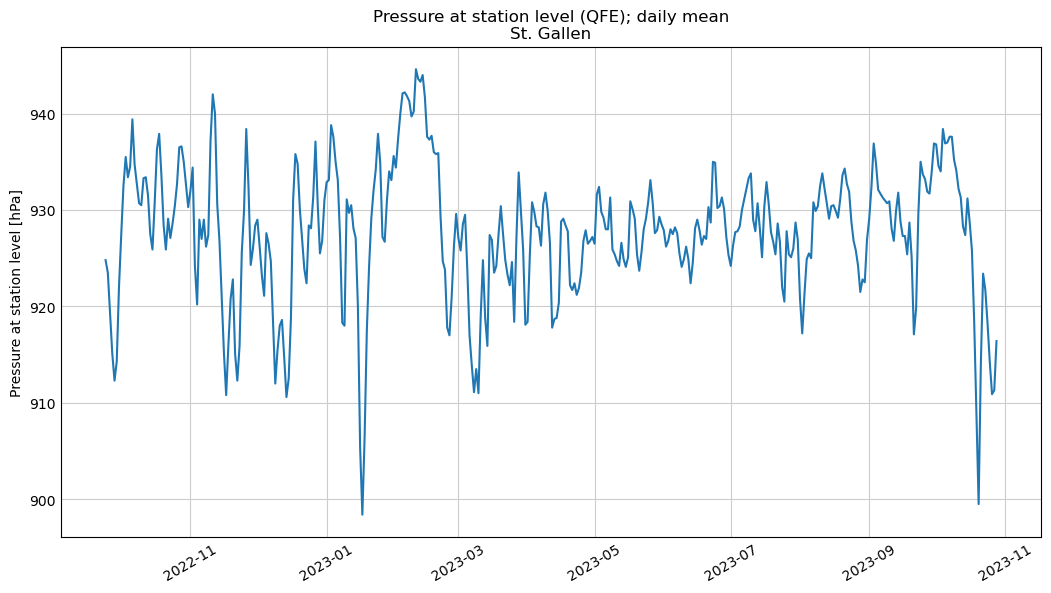

In [50]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.prestad0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Pressure at station level [hPa]')
plt.title('Pressure at station level (QFE); daily mean\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Precipitation

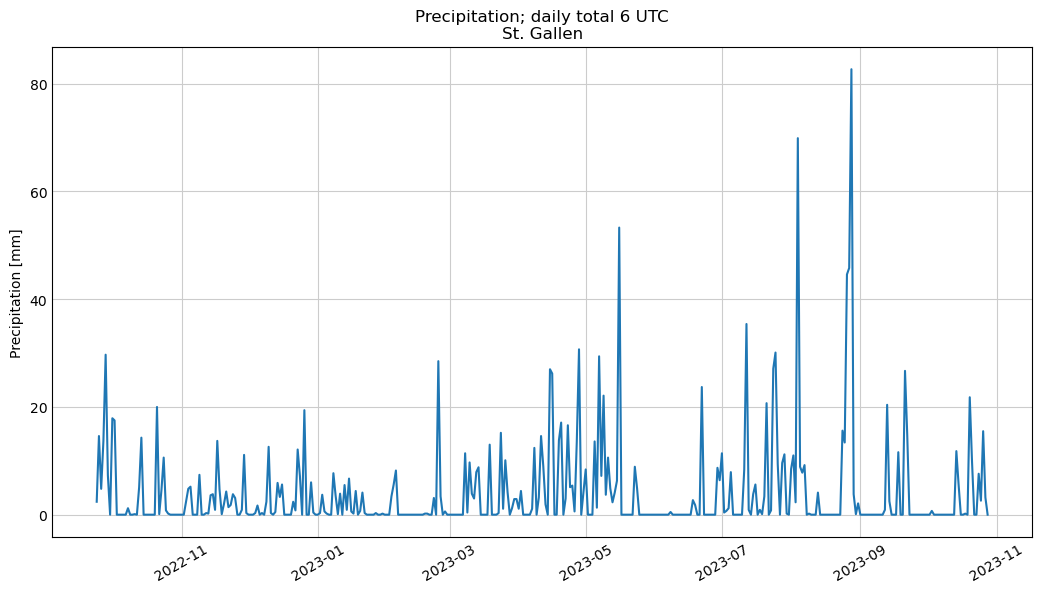

In [51]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.rre150d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Precipitation [mm]')
plt.title('Precipitation; daily total 6 UTC\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Sunshine duration

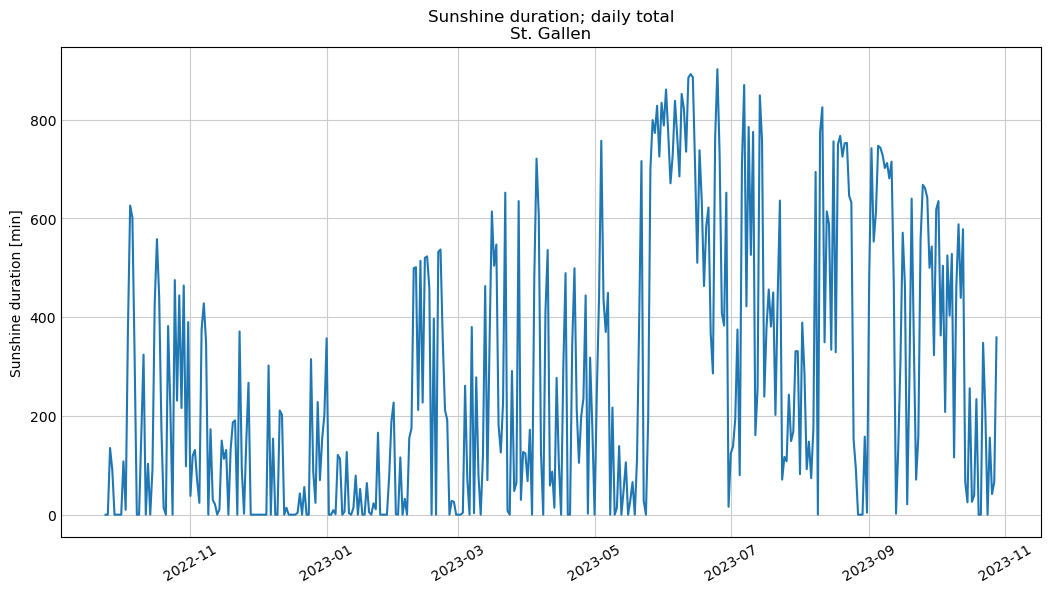

In [52]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.sre000d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Sunshine duration [min]')
plt.title('Sunshine duration; daily total\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Relative air humidity

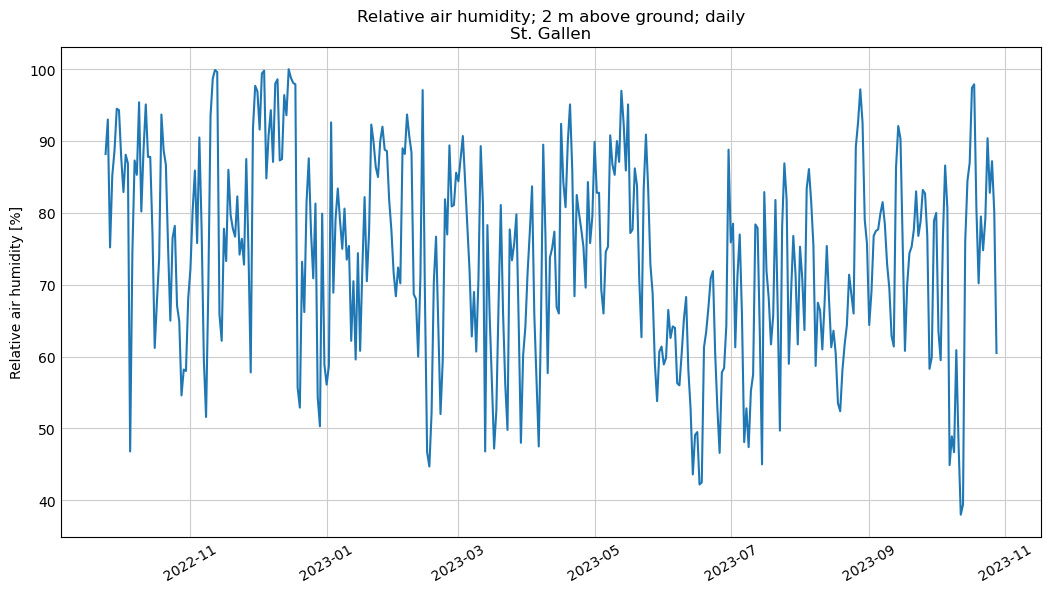

In [53]:
fig, axs = plt.subplots(figsize=(fswidth, fsheight))

axs.plot(df.index, df.ure200d0)
axs.grid(visible='visible', which='major', color='0.8', linestyle='-')

plt.xlabel('')
plt.ylabel('Relative air humidity [%]')
plt.title('Relative air humidity; 2 m above ground; daily\n' + wstation)
plt.xticks(rotation=30)

plt.show()

## Export as PDF Report

In [54]:
import os

# Note that this only reliably works when running a notebook in a browser. 
# So it does not currently work for things like nbconvert or papermill.
#import ipynbname
nb_fname = 'MeteoCH' # hard-coded: import ipynbname raises an exception...

out_fname = nb_fname + ".output"
#out_fname = nb_fname
#label = "FOOBAR"

static_format = 'pdf'  # pdf or html, etc.
os.system(f'jupyter nbconvert --no-input --to {static_format} {out_fname}.ipynb')

# Linux
os.system(f'mv {out_fname}.{static_format} {label}.{static_format}')
os.system(f'rm {out_fname}.ipynb')

# Windows
#os.system(f'del {label}.{static_format}')
#os.system(f'ren {out_fname}.{static_format} {label}.{static_format}')

os.system(f'echo done {wsno}: {label}')

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'MeteoCH.output.ipynb' matched no files
mv: cannot stat 'MeteoCH.output.pdf': No such file or directory
rm: cannot remove 'MeteoCH.output.ipynb': No such file or directory


0